In [11]:
import sys 
import stacklineplot
import torch
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 10]

### Denoising

In [9]:
samples = np.load("../denoise/results_denoise/889 _eval_recon.npy")

#### Original

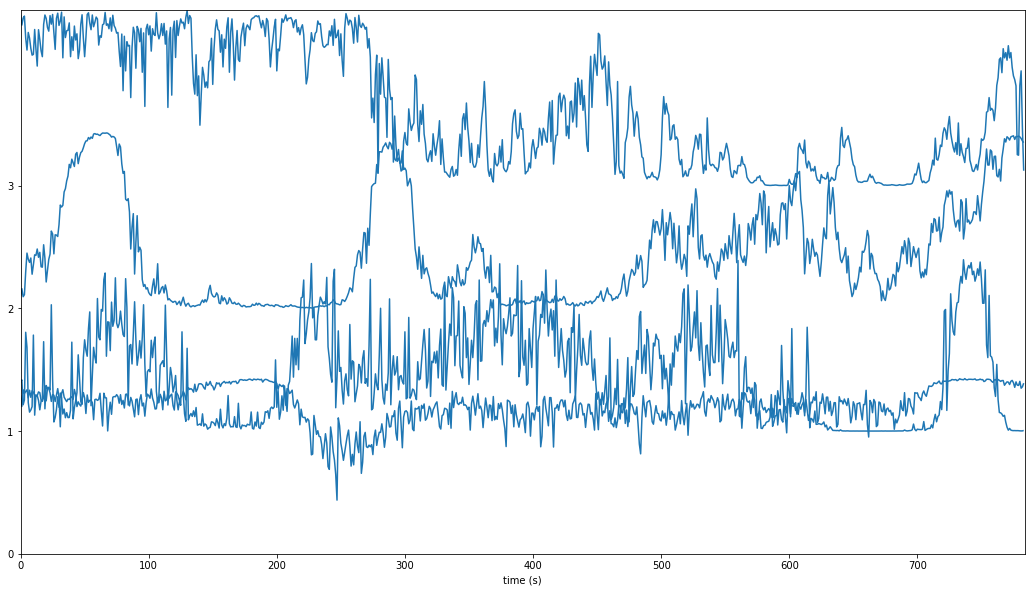

In [12]:
stacklineplot.stackplot(samples[:4])

#### Noisy

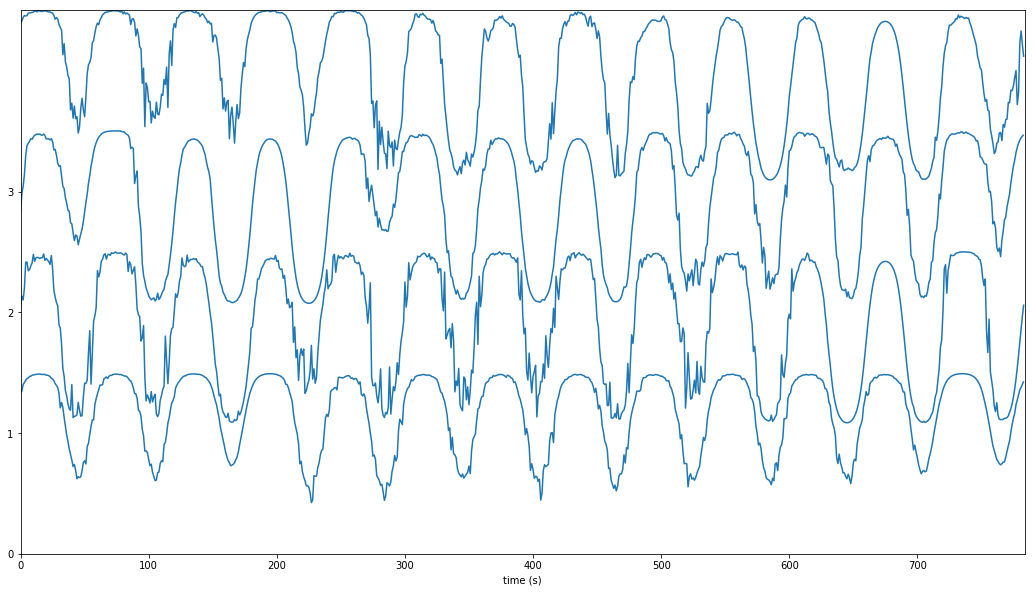

In [13]:
stacklineplot.stackplot(samples[16:16+4])

#### Denoise

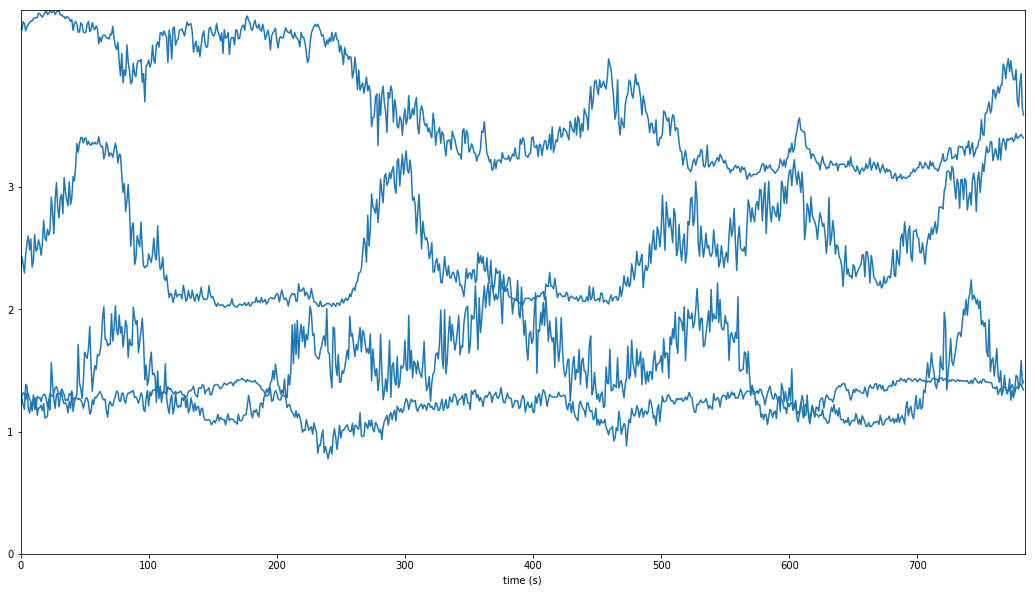

In [14]:
stacklineplot.stackplot(samples[16*2:16*2+4])